# Exploratory Data Analysis with Matplotlib and Plotly



Setting up the path

In [1]:
cd C:\Users\HP-15\Documents\TMDB movie dataset

C:\Users\HP-15\Documents\TMDB movie dataset


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import json
import seaborn as sns
%matplotlib inline
import re
from wordcloud import WordCloud

In [3]:
import plotly
plotly.tools.set_credentials_file(username='SakshamVikram', api_key='QoqXbiYSFGnkC40ovvMW')

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go


## Loading the Movies and Credits dataset 
Many of the columns are in json which has to be converted back into normal forms.

In [5]:
movies=pd.read_csv("tmdb_5000_movies.csv")
credits=pd.read_csv("tmdb_5000_credits.csv")
movie_json=['genres','keywords','production_countries','production_companies','spoken_languages',]
for col in movie_json:
    movies[col]=movies[col].apply(json.loads)
movies['release_date']=pd.to_datetime(movies['release_date'])

credits_json=['cast','crew']
for col in credits_json:
    credits[col]=credits[col].apply(json.loads)


    

### Here I try to find out the difference between columns Title and Original_title

In [9]:
for i in range(len(movies.title)):
               if not movies.title[i]==movies.original_title[i]:
                   print([movies.title[i],movies.original_title[i]])
               
               

['Shin Godzilla', 'シン・ゴジラ']
['Fantastic 4: Rise of the Silver Surfer', '4: Rise of the Silver Surfer']
['Asterix at the Olympic Games', 'Astérix aux Jeux Olympiques']
['The Flowers of War', '金陵十三釵']
['Evolution', 'Évolution']
['Arthur and the Invisibles', 'Arthur et les Minimoys']
['Top Cat Begins', 'Don Gato: El inicio de la pandilla']
['Two Brothers', 'Deux frères']
['Dragon Blade', '天將雄師']
['This Is It', "Michael Jackson's This Is It"]
['The Monkey King 2', '西游记之孙悟空三打白骨精']
['A Very Long Engagement', 'Un long dimanche de fiançailles']
['The Messenger: The Story of Joan of Arc', 'Joan of Arc']
['Earth', '1947: Earth']
['Solaris', 'Солярис']
['Curse of the Golden Flower', '滿城盡帶黃金甲']
['Hero', '英雄']
['Micmacs', 'Micmacs à tire-larigot']
['Why I Did (Not) Eat My Father', "Pourquoi j'ai pas mangé mon père"]
['The Impossible', 'Lo imposible']
['Amélie', "Le fabuleux destin d'Amélie Poulain"]
['The Warlords', '投名狀']
['Nomad: The Warrior', 'Nomad']
['A Monster in Paris', 'Un monstre à Paris']

In [41]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [6]:
movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'name': 'United States of America', 'iso_316...",2009-12-10,2787965087,162.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'name': 'Adventure', 'id': 12}, {'name': 'Fa...",http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'United States of America', 'iso_316...",2007-05-19,961000000,169.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'United Kingdom', 'iso_3166_1': 'GB'...",2015-10-26,880674609,148.0,"[{'name': 'Français', 'iso_639_1': 'fr'}, {'na...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'name': 'Action', 'id': 28}, {'name': 'Crime...",http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'name': 'United States of America', 'iso_316...",2012-07-16,1084939099,165.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://movies.disney.com/john-carter,49529,"[{'name': 'based on novel', 'id': 818}, {'name...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'name': 'United States of America', 'iso_316...",2012-03-07,284139100,132.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{'name': 'Fantasy', 'id': 14}, {'name': 'Acti...",http://www.sonypictures.com/movies/spider-man3/,559,"[{'name': 'dual identity', 'id': 851}, {'name'...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'name': 'United States of America', 'iso_316...",2007-05-01,890871626,139.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{'name': 'Animation', 'id': 16}, {'name': 'Fa...",http://disney.go.com/disneypictures/tangled/,38757,"[{'name': 'hostage', 'id': 1562}, {'name': 'ma...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'name': 'United States of America', 'iso_316...",2010-11-24,591794936,100.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{'name': 'marvel comic', 'id': 8828}, {'name'...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'name': 'United States of America', 'iso_316...",2015-04-22,1405403694,141

#### Converting The Features back to make the notebook  compatible with IMDB dataset which was takendown  and I have heavily  borrwoed from this                      kernel for the conversion. 


In [6]:
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    tmdb_movies['actor_1_gender']=credits['cast'].apply(lambda x:safe_access(x,[0,'gender']))
    tmdb_movies['actor_2_gender']=credits['cast'].apply(lambda x:safe_access(x,[1,'gender']))
    tmdb_movies['actor_3_gender']=credits['cast'].apply(lambda x:safe_access(x,[2,'gender']))
    
    
    return tmdb_movies

In [7]:
tmdb_movies=convert_format(movies,credits)
cleaned=tmdb_movies.drop(['homepage','tagline'],axis=1).dropna(axis=0).reset_index()

In [122]:
from sklearn import preprocessing
numerical_col=['budget','popularity','gross','num_voted_users','duration']
for col in numerical_col:
    cleaned[col]=preprocessing.scale(cleaned[col])



c:\users\hp-15\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [113]:
tmdb_movies

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name,actor_1_gender,actor_2_gender,actor_3_gender
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,11800,2009.0,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,1.0,1.0,2.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,4500,2007.0,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,2.0,1.0,2.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,4466,2015.0,United Kingdom,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes,2.0,1.0,2.0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,9106,2012.0,United States of America,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway,2.0,2.0,1.0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,2124,2012.0,United States of America,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe,1.0,1.0,2.0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,English,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,3576,2007.0,United States of America,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church,1.0,2.0,2.0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|musical|princes...,English,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,3330,2010.0,United States of America,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman,1.0,1.0,2.0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,English,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,6767,2015.0,United States of America,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans,2.0,2.0,2.0
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,English,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,5293,2009.0,United Kingdom,David Yates,Rupert Grint,Emma Watson,Tom Felton,2.0,1.0,2.0
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,English,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...",...,700

In [115]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 29 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
plot_keywords           4803 non-null object
language                4717 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null datetime64[ns]
gross                   4803 non-null int64
duration                4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
movie_title             4803 non-null object
vote_average            4803 non-null float64
num_voted_users         4803 n

## Exploring The NO. of Movies Released  By year
We see an inreasing trend which is quite intutive since the craze for movies

In [8]:
s=cleaned.groupby('title_year').count()
data=[go.Bar(x=s.index,y=s['budget'])]
py.iplot(data, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~SakshamVikram/0 or inside your plot.ly account where it is named 'basic-bar'


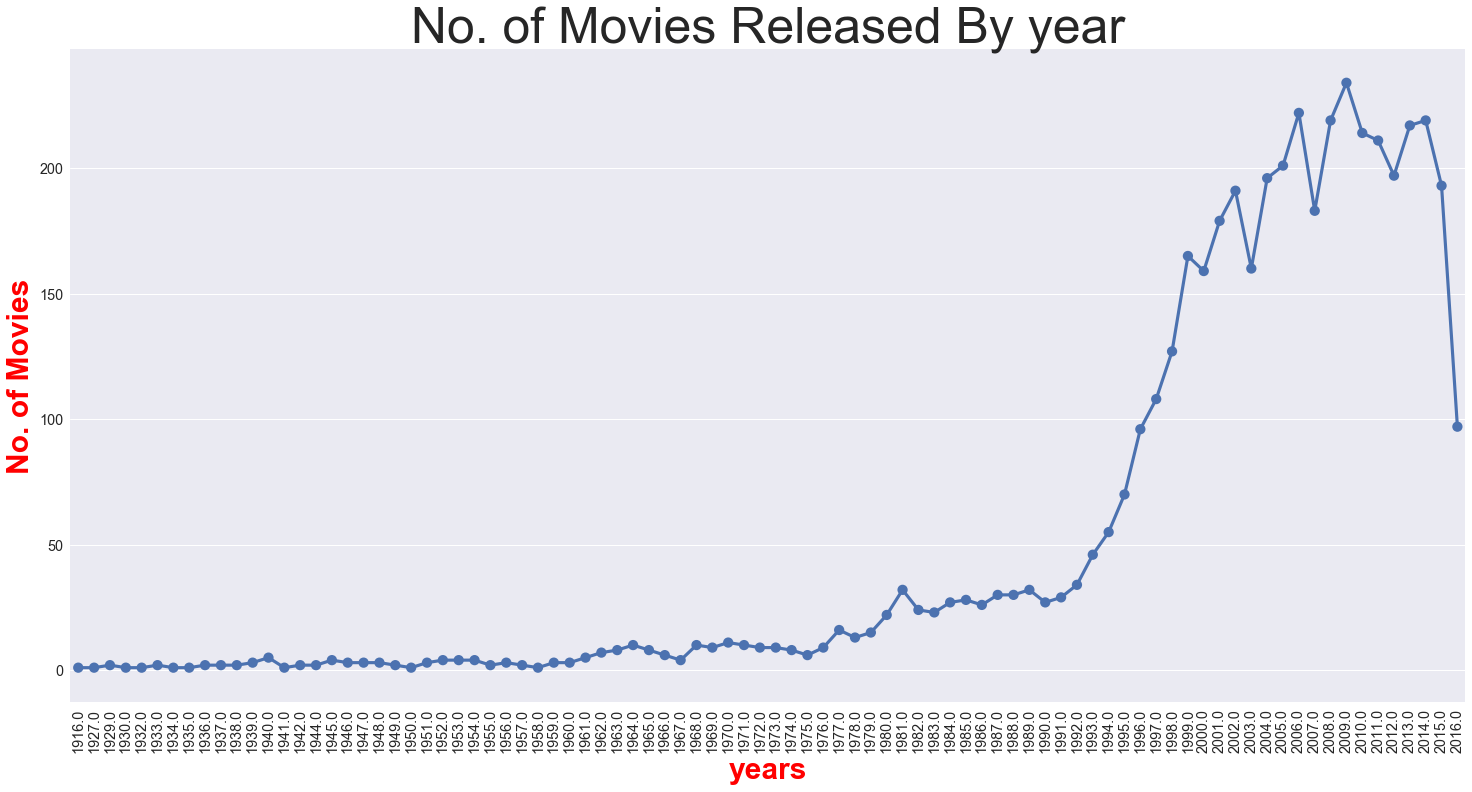

In [11]:
s=cleaned.groupby('title_year').count()
plt.figure(figsize=(25,12))
sns.pointplot(x=np.array(s.index),y=s['budget'])
sns.regplot(x=np.array(s.index),y=s['budget'],scatter=False,lowess=True)
plt.xticks(x=s.index,rotation='vertical',size='x-large')
plt.yticks(size='x-large')

plt.xlabel("years",size=30,weight='heavy',color='red')
plt.ylabel('No. of Movies',weight='heavy',color='red',size=30)
plt.title('No. of Movies Released By year',size=50)

plt.show()


### Here I try to visualise the relationship between No. of voted users and vote_average by year .
We see an increasing trend in the No. of voted_users which is acompanied by decreasing vote_average this points tho the fact that the users are becoming more critical with the voting.



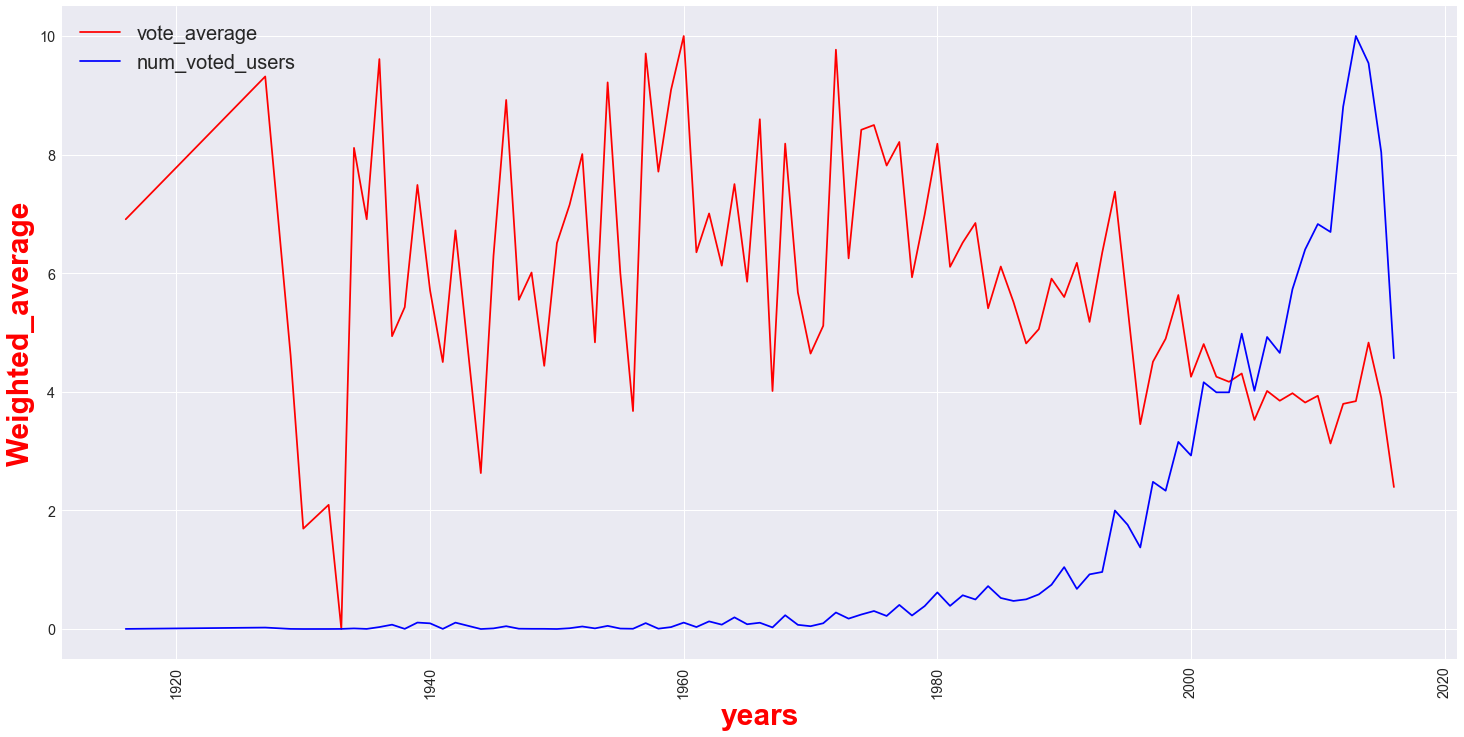

In [142]:
wm=lambda x:np.average(x,weights=cleaned.loc[x.index,'num_voted_users'])
data=cleaned.groupby('title_year').aggregate({'vote_average':wm,'num_voted_users':lambda x:np.sum(x)})
scaler=preprocessing.MinMaxScaler((0,10))##Scaling to bring both the columns on same sacle
scaled=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
plt.figure(figsize=(25,12))
plt.plot(np.array(data.index),scaled['vote_average'],'r')
plt.plot(np.array(data.index),scaled['num_voted_users'],'b')
plt.xticks(x=data.index,rotation='vertical',size='x-large')
plt.yticks(size='x-large')

plt.xlabel("years",size=30,weight='heavy',color='red')

plt.legend(loc='upper left',fontsize=20)


plt.show()

In [146]:
cleaned.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'movie_title', 'vote_average',
       'num_voted_users', 'title_year', 'country', 'director_name',
       'actor_1_name', 'actor_2_name', 'actor_3_name', 'actor_1_gender',
       'actor_2_gender', 'actor_3_gender'],
      dtype='object')

## Who are the Most Popular Directors :-
1. By Imdb score or the vote_average
2. Average Income  Grossed by the all their movies.

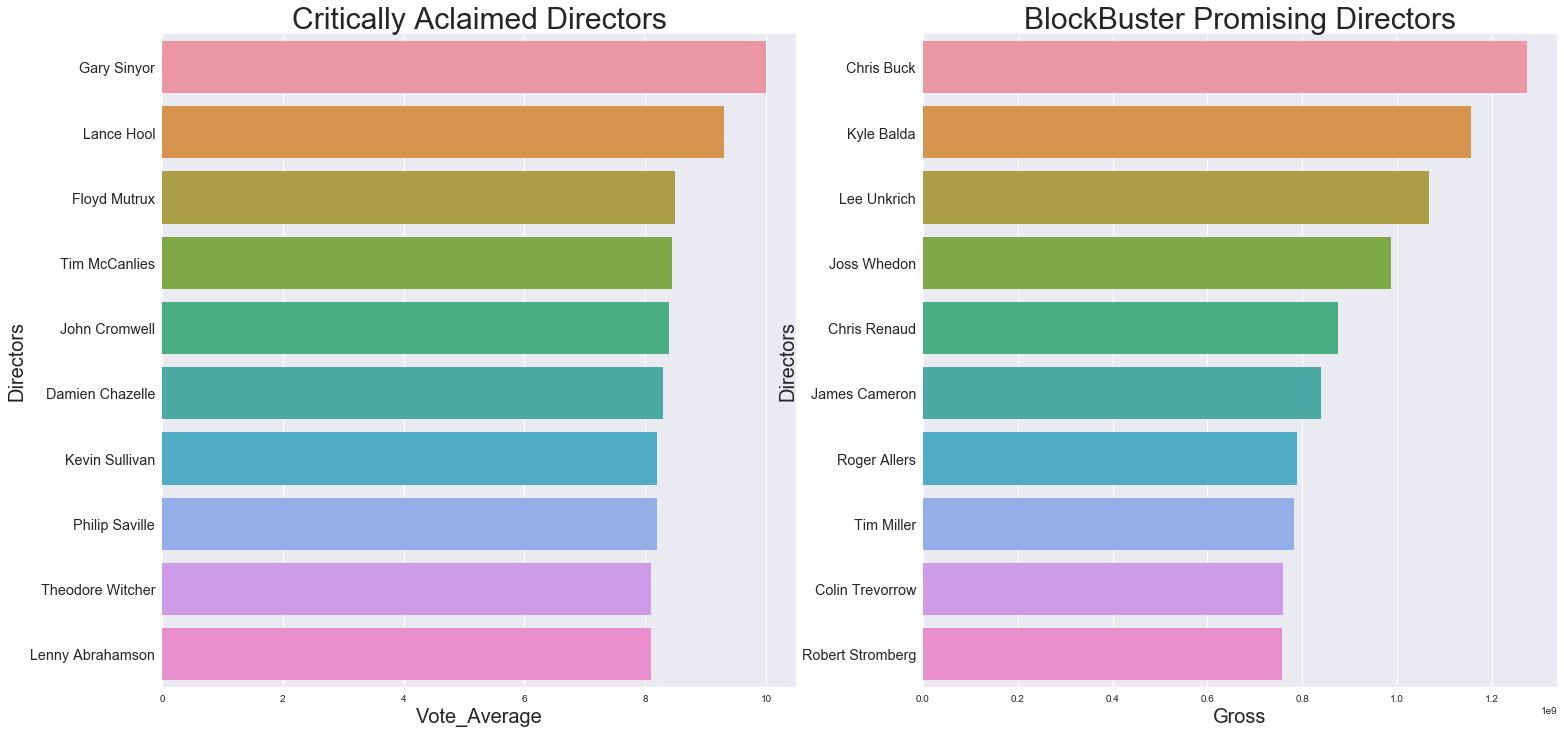

In [27]:
##This is the popularity of directors By The Votes
great_directors=cleaned.groupby('director_name').agg({'gross':np.average,'vote_average':np.average})
g_gross=great_directors.sort_values('gross',ascending=False).reset_index().iloc[:10,:]
g_vote=great_directors.sort_values('vote_average',ascending=False).reset_index().iloc[:10,:]

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,12))
sns.barplot(y='director_name',x='vote_average',data=g_vote,ax=ax[0])
sns.barplot(y='director_name',x='gross',data=g_gross,ax=ax[1])
ax[0].set_yticklabels(labels=g_vote['director_name'],size='x-large')
ax[0].set_ylabel('Directors',size=20)
ax[0].set_xlabel('Vote_Average',size=20)
ax[0].set_title('Critically Aclaimed Directors',fontsize=30)
ax[1].set_yticklabels(labels=g_gross['director_name'],size='x-large')
ax[1].set_ylabel('Directors',size=20)
ax[1].set_xlabel('Gross',size=20)
ax[1].set_title('BlockBuster Promising Directors',fontsize=30)

plt.show()

## Corrplot reveals some important findings such as
1.Movies with High Budget tend to have High Income as well.
2.There is a strong corelation between Budget and Gross, which is a good new for directors:)
3.As expected critics have nothing to do with the budget .

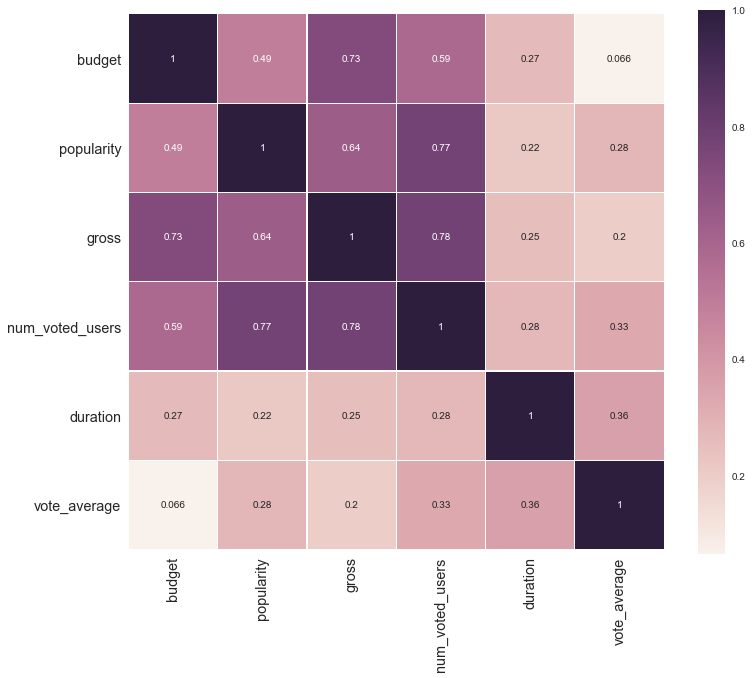

In [13]:
new_data=cleaned[['budget','popularity','gross','num_voted_users','duration','vote_average']]
col=['budget', 'popularity', 'gross', 'voter_count', 'duration',
       'vote_average']
corr=new_data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,square=True,linewidths=.15)
plt.xticks(label=col,size='x-large',rotation='vertical')
plt.yticks(y=col,size='x-large',rotation='horizontal')
plt.show()

## Female Protagonist 
Here I have Divided the movies into three classes:
1. Movies with Lead Female Actor and rest 2 male
2. Movies with First 2 Lead Female and rest male
3. Movies with all 3 Lead  as Female Actors
Then I have got the Top_20 Actress Based on Popularity and on the money their movie Grossed
Same Popularity And Gross will be given to each actrees involved in a movie pertaining to the above criterion.

In [23]:
df=cleaned[(cleaned['actor_1_gender']==1)&(cleaned['actor_2_gender']==2)&(cleaned['actor_3_gender']==2)][['actor_1_name','gross','popularity']].reset_index()
df1=cleaned[(cleaned['actor_1_gender']==1)&(cleaned['actor_2_gender']==1)&(cleaned['actor_3_gender']==2)][['actor_2_name','gross','popularity']].reset_index()
df2=cleaned[(cleaned['actor_1_gender']==1)&(cleaned['actor_2_gender']==1)&(cleaned['actor_3_gender']==1)][['actor_3_name','gross','popularity']].reset_index()

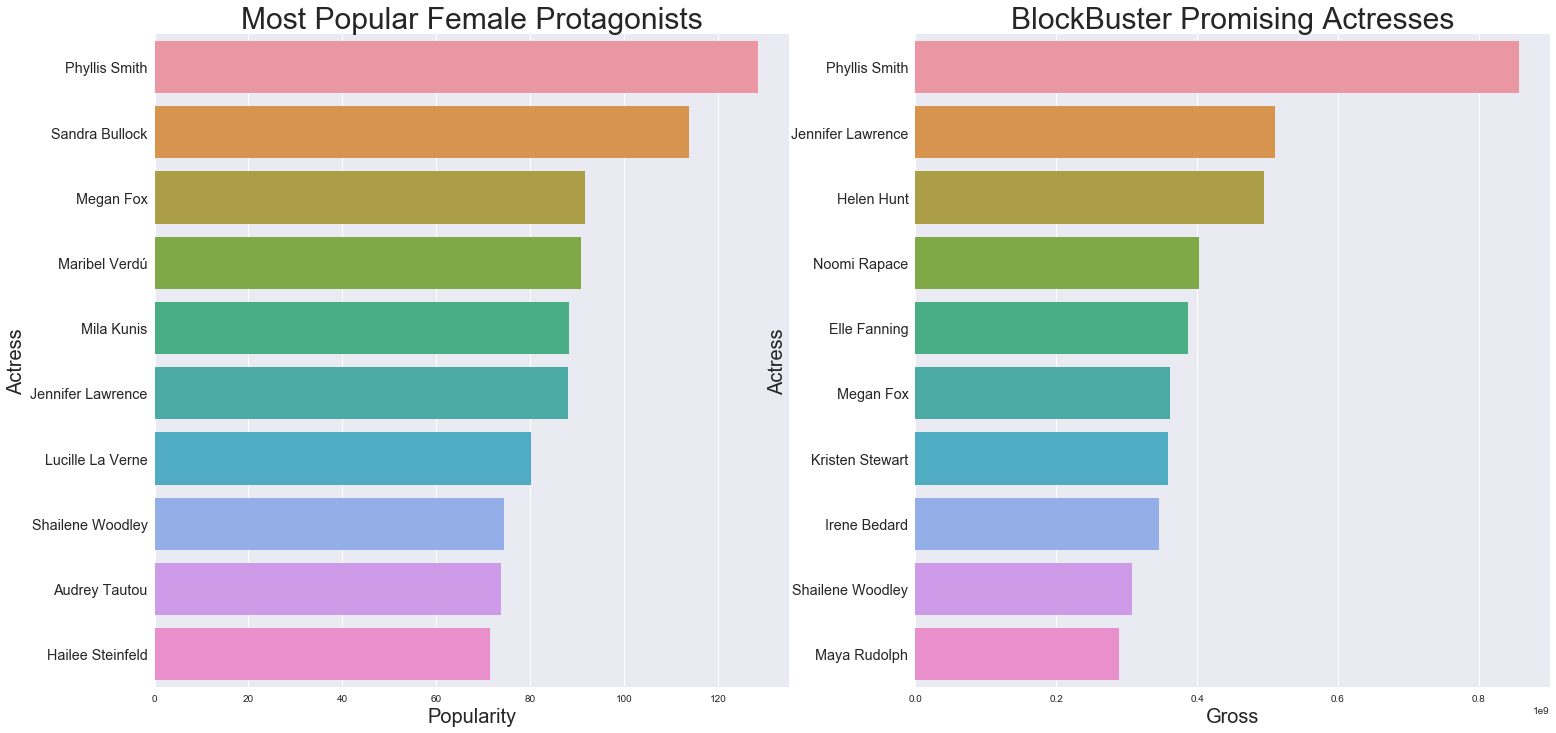

In [28]:
df.columns=['index','Actress','gross','popularity']
df1.columns=['index','Actress','gross','popularity']
df2.columns=['index','Actress','gross','popularity']
s=pd.concat([df,df1,df2],axis=0)
s.drop('index',inplace=True,axis=1)
s=s[s['gross']!=0]
pro=s.groupby('Actress').agg({'gross':np.average}).reset_index()
grosser=pro.sort_values('gross',ascending=False).reset_index().drop('index',axis=1).iloc[:10,:]
pro=s.groupby('Actress').agg({'popularity':np.average}).reset_index()
popular=pro.sort_values('popularity',ascending=False).reset_index().drop('index',axis=1).iloc[:10,:]

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(25,12))
sns.barplot(y='Actress',x='popularity',data=popular,ax=ax[0])
sns.barplot(y='Actress',x='gross',data=grosser,ax=ax[1])
ax[0].set_yticklabels(labels=popular['Actress'],size='x-large')
ax[0].set_ylabel('Actress',size=20)
ax[0].set_xlabel('Popularity',size=20)
ax[0].set_title('Most Popular Female Protagonists',fontsize=30)
ax[1].set_yticklabels(labels=grosser['Actress'],size='x-large')
ax[1].set_ylabel('Actress',size=20)
ax[1].set_xlabel('Gross',size=20)
ax[1].set_title('BlockBuster Promising Actresses',fontsize=30)

plt.show()

## Let's Find out the most popular Genre 
Here we Begin By getting a list of different genres

In [11]:
temp=""
for i in cleaned.genres:
    temp=temp+'|'+i
    
genres_list=list(set(temp.split('|')))
del genres_list[0]##Data Cleaning.
genres_list


['Family',
 'War',
 'Action',
 'Science Fiction',
 'Horror',
 'Documentary',
 'Drama',
 'Mystery',
 'Music',
 'Adventure',
 'Thriller',
 'Crime',
 'Animation',
 'Western',
 'Comedy',
 'History',
 'Fantasy',
 'Foreign',
 'TV Movie',
 'Romance']

Now that we have  a list of genres and each movie has multiple tags .We give each genre equal popularity for the movie they are tagged in. 

In [13]:
dict_genres=dict()
for i in genres_list:
    dict_genres[i]=[]

for i in range(len(cleaned.genres)):
    diff=cleaned.genres[i].split("|")
    for j in diff:
        if re.search(r'[a-zA-Z]+',j):
            dict_genres[j].append(cleaned.popularity[i])
 


Here we calculate the mean and standard Deviation assocaited with each genre because so as to take in account the standard error associated with each mean.

In [19]:
genres=dict_genres.keys()
favourite_mean=[]
for i in genres:
    favourite_mean.append((np.array(dict_genres[i]).mean(),np.array(dict_genres[i]).std()/np.sqrt(len(dict_genres[i])),i))
top_10=sorted(favourite_mean,key=lambda x:x[0],reverse=True)
means,std,genres=zip(*top_10)



[(39.815259913881754, 2.1683401892026763, 'Adventure'),
 (39.635279458515292, 4.2007603231164836, 'Animation'),
 (37.186868358778625, 2.4203749005449358, 'Science Fiction'),
 (36.723052342857144, 1.667878009762082, 'Fantasy'),
 (31.552996987610616, 1.2117465159749292, 'Action'),
 (29.066888079591838, 2.1545657359086534, 'Family'),
 (24.982646435672518, 1.272743046818557, 'Mystery'),
 (24.857738739026338, 0.83135991704116963, 'Thriller'),
 (24.103938830985918, 2.133260402328871, 'War'),
 (23.211237785401462, 0.8610760007917021, 'Crime'),
 (19.0259526124498, 0.76350671441620499, 'Horror'),
 (18.933932441283293, 0.76337815343462623, 'Comedy'),
 (18.686398237500001, 2.2629663190175813, 'Western'),
 (18.467398091363634, 0.56029163208106136, 'Drama'),
 (17.61873924102564, 1.3654065630796024, 'History'),
 (16.503048944315545, 0.60421749381153633, 'Romance'),
 (13.52409251955307, 1.0609527054725836, 'Music'),
 (6.3894147500000003, 2.6492075333606584, 'TV Movie'),
 (5.7172204507042252, 0.661622

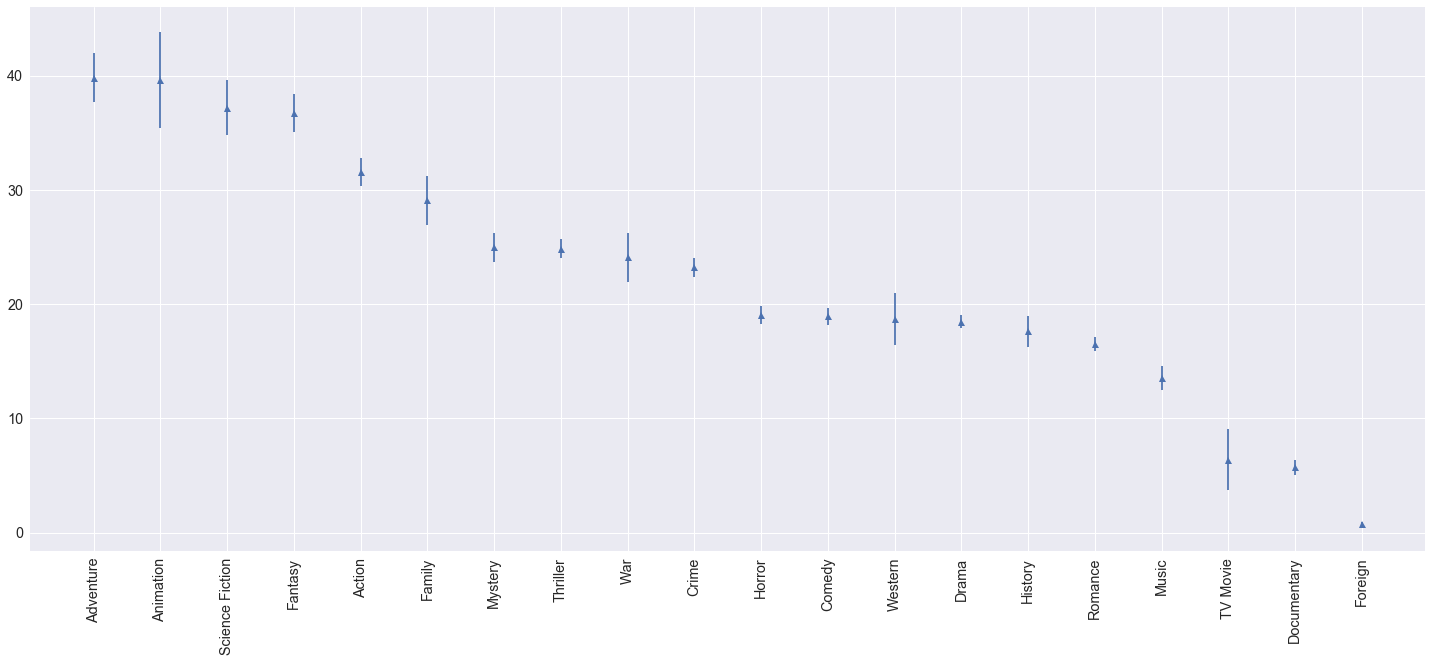

In [15]:
plt.figure(figsize=(25,10))
x = np.arange(1,21,1)
y = means
labels = list(genres)
plt.errorbar(x, y,std,linestyle='None', marker='^')

plt.xticks(x, labels,rotation='vertical',size='x-large')
plt.yticks(size='x-large')
plt.show()

In [315]:
list(genres)

['Adventure',
 'Animation',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Family',
 'Mystery',
 'Thriller',
 'War',
 'Crime',
 'Horror',
 'Comedy',
 'Western',
 'Drama',
 'History',
 'Romance',
 'Music',
 'TV Movie',
 'Documentary',
 'Foreign']

# Plotly Pie chart Depicting the top_10 genres on Popularity score
This shows Adventure,animation and Science Fiction as top genres.

In [21]:
labels=list(genres)[:10]
values=means[:10]
trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

# Word Cloud Based on No. of Movies For Each Genre
Here we can see that Drama,Comedy and Action as the most popular Genres.

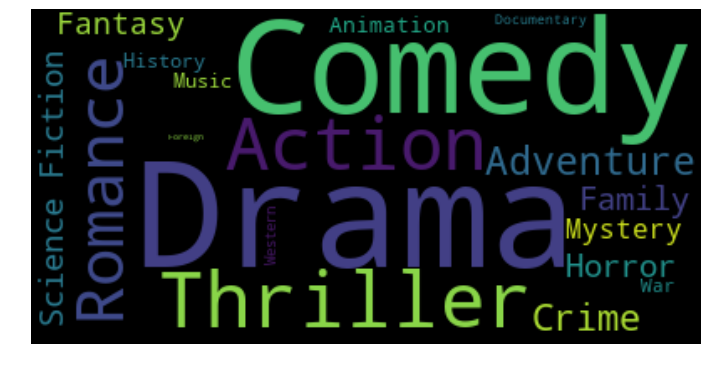

In [334]:
dict_freq={}

for i in genres:
    dict_freq[i]=len(dict_genres[i])
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict_freq)
plt.figure(figsize=(12,25))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()